<a href="https://colab.research.google.com/github/Ashwiga/Ashwi/blob/main/AirQualityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet


In [ ]:
from google.colab import files
files.upload()



Saving Delhi_AQIBulletins.csv to Delhi_AQIBulletins.csv


{'Delhi_AQIBulletins.csv': b'date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant\n2015-05-01,Delhi,,Poor,221,O3\n2015-05-02,Delhi,,Poor,238,"O3, PM2.5"\n2015-05-03,Delhi,,Poor,259,"O3, PM10"\n2015-05-04,Delhi,,Poor,289,"O3, PM10"\n2015-05-05,Delhi,,Very poor,311,"O3, PM10, PM2.5"\n2015-05-06,Delhi,,Very Poor,305,"PM10, PM2.5"\n2015-05-07,Delhi,,Poor,254,"PM10, PM2.5"\n2015-05-08,Delhi,,Poor,229,"PM10, PM2.5"\n2015-05-09,Delhi,,Poor,234,"PM10, PM2.5"\n2015-05-10,Delhi,,Poor,290,"O3, PM10, PM2.5"\n2015-05-11,Delhi,,Poor,262,"O3, PM10"\n2015-05-12,Delhi,,Poor,228,"O3, PM10, PM2.5"\n2015-05-13,Delhi,,Moderate,183,"CO, PM2.5"\n2015-05-15,Delhi,7.0,Poor,208,PM2.5\n2015-05-16,Delhi,5.0,Poor,288,"O3, PM10"\n2015-05-17,Delhi,5.0,Poor,261,"O3, PM2.5"\n2015-05-18,Delhi,6.0,Poor,269,"O3, PM10"\n2015-05-19,Delhi,5.0,Poor,227,"PM10, PM2.5"\n2015-05-20,Delhi,5.0,Poor,212,"O3, PM10"\n2015-05-21,Delhi,5.0,Moderate,147,"O3, PM10, PM2.5"\n2015-05-22,Delhi,6.0,Moderate,192,"O3, PM2.5"\n2015

In [ ]:
import pandas as pd

df = pd.read_csv("Delhi_AQIBulletins.csv")
df.head()

,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
0,2015-05-01,Delhi,NaN,Poor,221,O3
1,2015-05-02,Delhi,NaN,Poor,238,"O3, PM2.5"
2,2015-05-03,Delhi,NaN,Poor,259,"O3, PM10"
3,2015-05-04,Delhi,NaN,Poor,289,"O3, PM10"
4,2015-05-05,Delhi,NaN,Very poor,311,"O3, PM10, PM2.5"


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 3143 non-null   object 
 1   City                 3143 non-null   object 
 2   No. Stations         3130 non-null   float64
 3   Air Quality          3143 non-null   object 
 4   Index Value          3143 non-null   int64  
 5   Prominent Pollutant  3143 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 147.5+ KB


,0
date,0
City,0
No. Stations,13
Air Quality,0
Index Value,0
Prominent Pollutant,0


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df = df.sort_values('date')

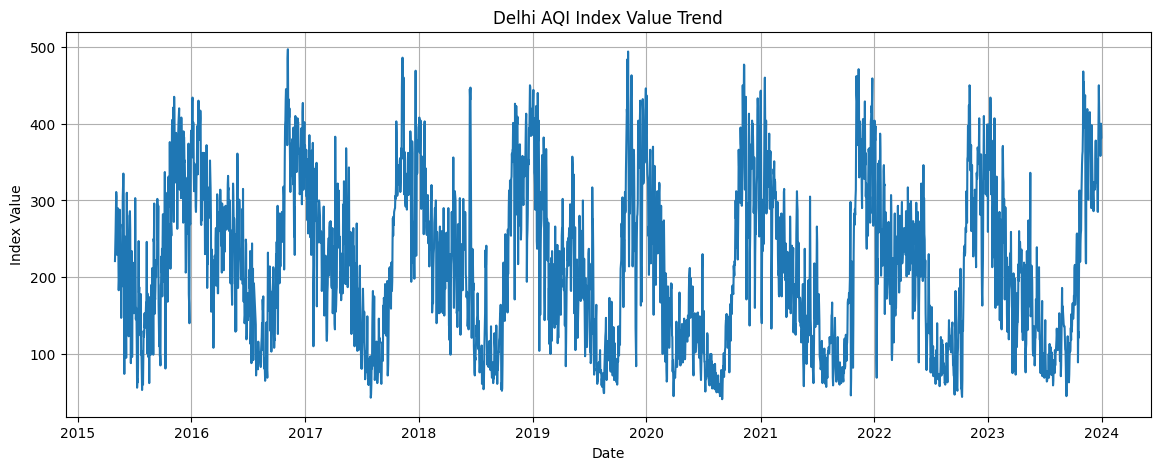

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df['date'], df['Index Value'])
plt.title("Delhi AQI Index Value Trend")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()


In [ ]:
df.isnull().sum()

,0
date,0
City,0
No. Stations,13
Air Quality,0
Index Value,0
Prominent Pollutant,0


In [ ]:
df[(df['Index Value'] < 0) | (df['Index Value'] > 500)]


,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant


<Axes: title={'center': 'Prominent Pollutant Distribution'}, xlabel='Prominent Pollutant'>

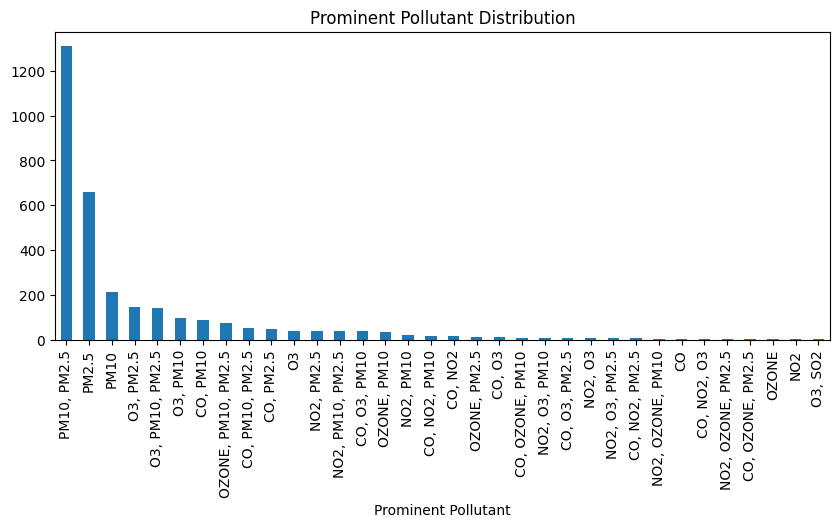

In [ ]:
df['Prominent Pollutant'].value_counts().plot(
    kind='bar',
    figsize=(10,4),
    title="Prominent Pollutant Distribution"
)

In [ ]:
df_ts = df[['date', 'Index Value']].copy()
df_ts.head()


,date,Index Value
0,2015-05-01,221
1,2015-05-02,238
2,2015-05-03,259
3,2015-05-04,289
4,2015-05-05,311


In [ ]:
df_ts['target'] = df_ts['Index Value'].shift(-1)


In [ ]:
df_ts = df_ts.dropna()


In [ ]:
df_ts['lag1'] = df_ts['Index Value'].shift(1)
df_ts['lag2'] = df_ts['Index Value'].shift(2)
df_ts['lag3'] = df_ts['Index Value'].shift(3)


In [ ]:
df_ts = df_ts.dropna()


In [ ]:
train_size = int(len(df_ts) * 0.8)

train = df_ts[:train_size]
test = df_ts[train_size:]


In [ ]:
X_train = train[['lag1', 'lag2', 'lag3']]
y_train = train['target']

X_test = test[['lag1', 'lag2', 'lag3']]
y_test = test['target']


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

mae, rmse


(40.91299546376279, np.float64(52.33025052813891))

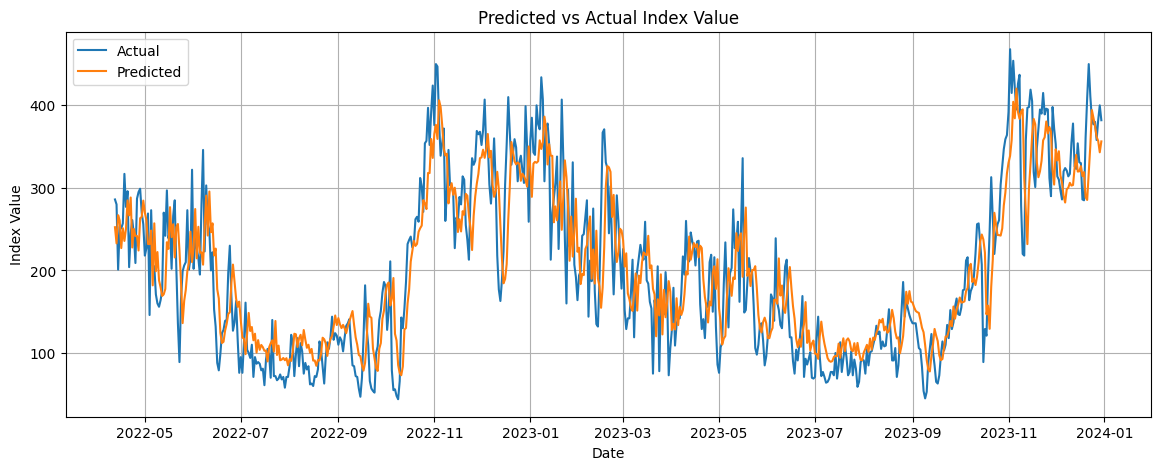

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(test['date'], y_test, label='Actual')
plt.plot(test['date'], pred, label='Predicted')
plt.legend()
plt.title("Predicted vs Actual Index Value")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()


In [ ]:
df_cluster = df[['date', 'Index Value']].copy()
df_cluster.head()

,date,Index Value
0,2015-05-01,221
1,2015-05-02,238
2,2015-05-03,259
3,2015-05-04,289
4,2015-05-05,311


In [ ]:
df_cluster = df_cluster.dropna()


In [ ]:
import numpy as np

X = df_cluster['Index Value'].values.reshape(-1, 1)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X)


In [ ]:
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_centers


array([110.07872697, 356.16034272, 229.71819788])

In [ ]:
sorted_clusters = np.argsort(cluster_centers)

cluster_labels = {
    sorted_clusters[0]: "Low Pollution",
    sorted_clusters[1]: "Medium Pollution",
    sorted_clusters[2]: "High Pollution"
}

df_cluster['Pollution Level'] = df_cluster['cluster'].map(cluster_labels)


<Axes: title={'center': 'Distribution of Pollution Clusters'}, xlabel='Pollution Level'>

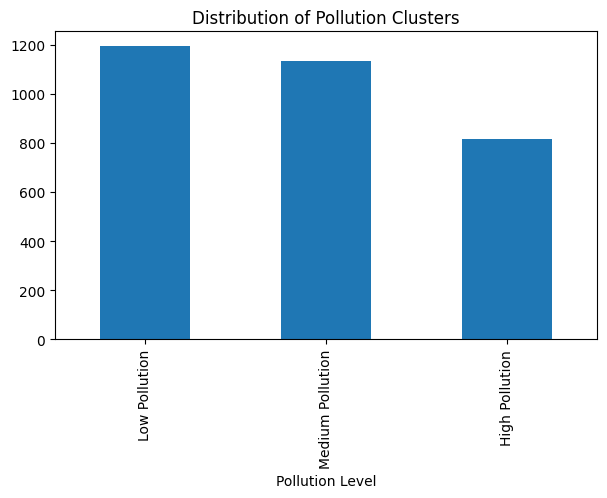

In [ ]:
df_cluster['Pollution Level'].value_counts().plot(
    kind='bar',
    figsize=(7,4),
    title="Distribution of Pollution Clusters"
)


In [ ]:
df.rename(columns={
    'date': 'Date',
    'Index Value': 'IndexValue'
}, inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df = df.dropna(subset=['Date', 'IndexValue'])


Monthly Average Index Values:

Date
2015-05-31    242.333333
2015-06-30    191.920000
2015-07-31    138.129032
2015-08-31    147.100000
2015-09-30    194.466667
                 ...    
2023-08-31    116.483871
2023-09-30    107.833333
2023-10-31    218.935484
2023-11-30    372.866667
2023-12-31    348.032258
Freq: ME, Name: IndexValue, Length: 104, dtype: float64

Pollution Category by Month:

Date
2015-05-31          Moderate
2015-06-30          Moderate
2015-07-31             Clean
2015-08-31             Clean
2015-09-30          Moderate
                   ...      
2023-08-31             Clean
2023-09-30             Clean
2023-10-31          Moderate
2023-11-30    High Pollution
2023-12-31    High Pollution
Freq: ME, Name: IndexValue, Length: 104, dtype: object


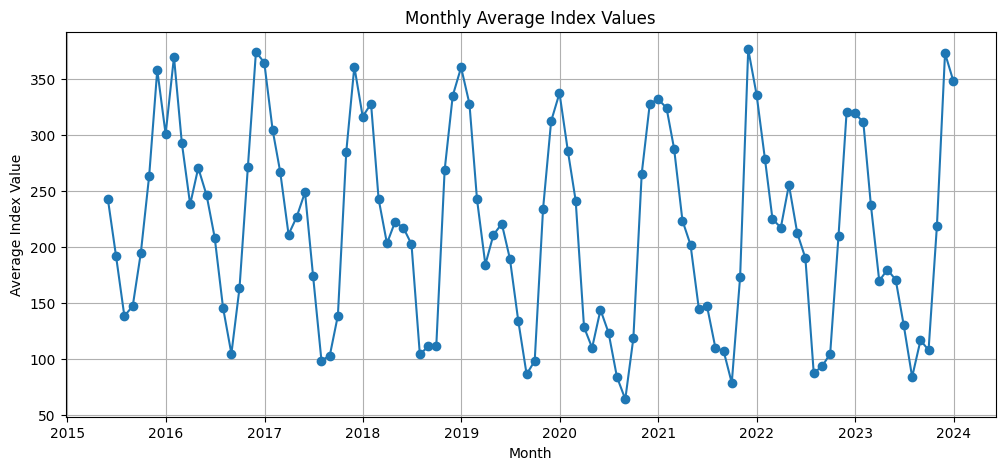


---- AI Seasonal Insight ----
⚠️ High Pollution Months: November, December, January, November, December, January, November, December, January, November, December, January, November, December, November, December, January, November, December, November, December, January, November, December
🔶 Moderate Pollution Months: May, June, September, October, February, March, April, May, June, September, October, February, March, April, May, June, October, February, March, April, May, June, October, February, March, April, May, June, October, January, February, October, February, March, April, October, January, February, March, April, May, June, October, February, March, April, May, October
🟢 Clean Months: July, August, July, August, July, August, September, July, August, September, July, August, September, March, April, May, June, July, August, September, May, June, July, August, September, July, August, September, June, July, August, September

Insight Summary:
❗ These months consistently show p

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# ---- CLEANING ----
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'IndexValue'])

df = df.set_index('Date')

#---- MONTHLY AVERAGES (using 'ME' → Month-End) ----
monthly_avg = df.resample('ME')['IndexValue'].mean()

# ---- CATEGORIZE MONTHS ----
def categorize_pollution(value):
    if value < 150:
        return "Clean"
    elif 150 <= value < 300:
        return "Moderate"
    else:
        return "High Pollution"

monthly_categories = monthly_avg.apply(categorize_pollution)

# ---- PRINT RESULTS ----
print("Monthly Average Index Values:\n")
print(monthly_avg)

print("\nPollution Category by Month:\n")
print(monthly_categories)

# ---- PLOT ----
plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Monthly Average Index Values")
plt.xlabel("Month")
plt.ylabel("Average Index Value")
plt.grid(True)
plt.show()

# ---- AI Seasonal Insight ----
high_months = monthly_categories[monthly_categories == "High Pollution"].index.strftime("%B").tolist()
moderate_months = monthly_categories[monthly_categories == "Moderate"].index.strftime("%B").tolist()
clean_months = monthly_categories[monthly_categories == "Clean"].index.strftime("%B").tolist()

print("\n---- AI Seasonal Insight ----")

if high_months:
    print(f"⚠️ High Pollution Months: {', '.join(high_months)}")
else:
    print("No high pollution months detected.")

if moderate_months:
    print(f"🔶 Moderate Pollution Months: {', '.join(moderate_months)}")

if clean_months:
    print(f"🟢 Clean Months: {', '.join(clean_months)}")

print("\nInsight Summary:")
if high_months:
    print("These months consistently show poor air quality. Policies should target emission control and traffic reduction during this period.")
else:
    print("Overall pollution levels are stable without major seasonal spikes.")

print("✓ Task 4 Completed Successfully.")
